In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [19]:
pac12 = pd.read_csv('/home/blair/cognixia_workspace/CFB_Statistics/CFB_Stats/Pac-12_cleaned.csv')
sec = pd.read_csv('/home/blair/cognixia_workspace/CFB_Statistics/CFB_Stats/SEC_cleaned.csv')

pac12_sec = pd.concat([pac12, sec]).sort_values('Player')
pac12_sec = pac12_sec.drop(columns=['Lg', 'YdsL'])
pac12_sec.to_csv('Pac12_and_SEC.csv', index=False)

In [20]:
pac12_and_sec = pd.read_csv('/home/blair/cognixia_workspace/CFB_Statistics/CFB_Stats/Pac12_and_SEC.csv')
pac12_and_sec

,Player,Team,Int,Yds,Avg,TD,Solo,Ast,Tot,Sack,Stat Type,Conference
0,Aashari Crosswell,AZST,3,103,34.33,0,35,8,43,0.0,Defense,Pac-12
1,Adam Sparks,MIZZ,1,0,0.00,0,31,7,38,0.0,Defense,SEC
2,Adarius Pickett,UCLA,2,34,17.00,0,77,46,123,0.0,Defense,Pac-12
3,Ajene Harris,USC,1,6,6.00,1,34,24,58,0.0,Defense,Pac-12
4,Alameen Murphy,STAN,2,32,16.00,0,18,17,35,0.0,Defense,Pac-12
...,...,...,...,...,...,...,...,...,...,...,...,...
195,Vernon Dasher,MISS,1,88,88.00,1,18,18,36,0.0,Defense,SEC
196,Willie Gay Jr.,MSST,2,49,24.50,0,20,28,48,5.0,Defense,SEC
197,Willie Taylor,WSU,1,40,40.00,0,17,13,30,4.0,Defense,Pac-12
198,Xavier McKinney,ALA,2,23,11.50,1,44,29,73,3.0,Defense,SEC


In [68]:
interceptions = pac12_and_sec.sort_values(['Int'], ascending=False).apply(lambda interceptions:interceptions)
interceptions = interceptions[interceptions['Int'] >= 4]

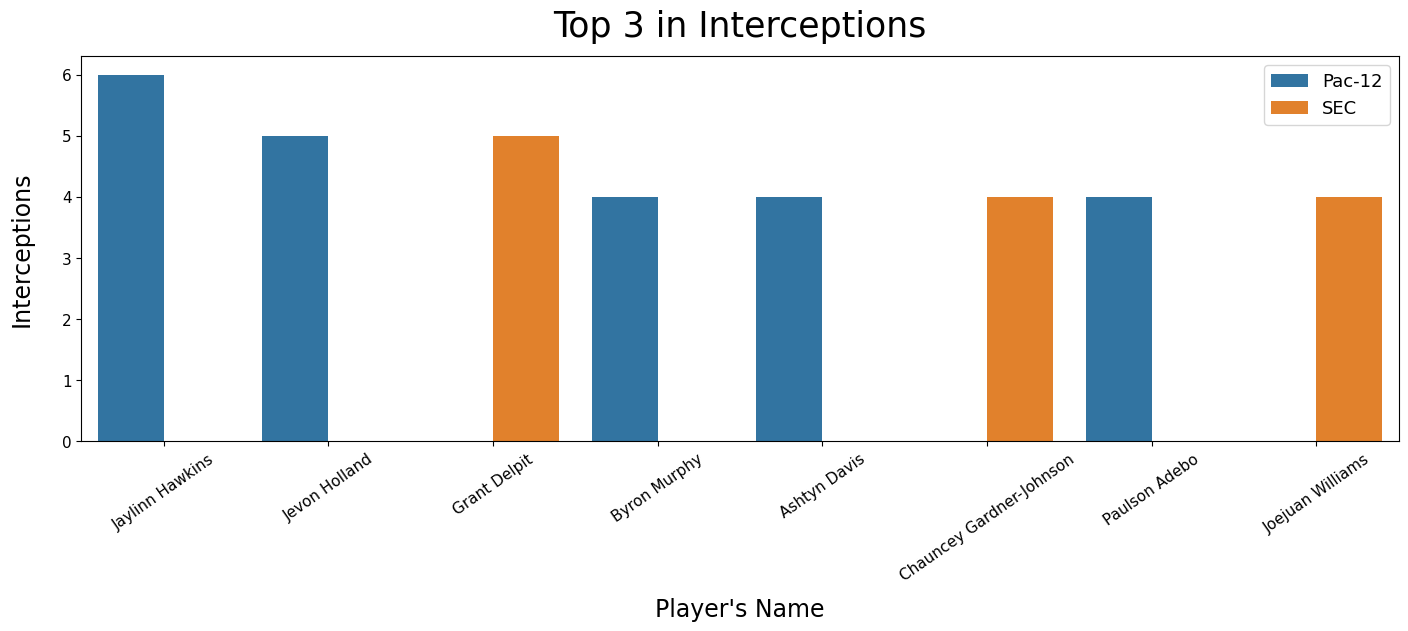

In [103]:
ax = sns.barplot(data=interceptions, x='Player', y='Int', hue='Conference')
ax.figure.set_size_inches(17, 5)
x = np.linspace(1, 10, 1000)
y = np.sin(x)
plt.title('Top 3 in Interceptions', fontsize=25, y=1.03)
plt.xticks(rotation=35, fontsize=11)
plt.yticks(fontsize=11)
plt.xlabel('Player\'s Name', fontsize=17, labelpad=10)
plt.ylabel('Interceptions', fontsize=17, labelpad=20)
plt.legend(fontsize=13)
plt.show()